In [2]:
# Let us first read the data from the file and do a quick visualization
import pandas as pd
import matplotlib.pyplot as plt
train = pd.read_csv("01-train.csv")
train

,Weight,Colour,Label
0,303,3,B
1,370,1,A
2,298,3,B
3,277,3,B
4,377,4,A
5,299,3,B
6,382,1,A
7,374,4,A
8,303,4,B
9,309,3,B


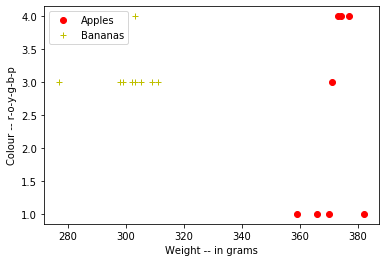

In [3]:
apples = train[train.Label == "A"]
bananas = train[train.Label == "B"]
plt.plot(apples.Weight, apples.Colour, "ro")
plt.plot(bananas.Weight, bananas.Colour, "y+")
plt.xlabel("Weight -- in grams")
plt.ylabel("Colour -- r-o-y-g-b-p")
plt.legend(["Apples", "Bananas"])
plt.show()

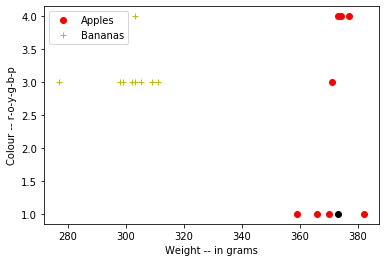

In [4]:
plt.plot(apples.Weight, apples.Colour, "ro")
plt.plot(bananas.Weight, bananas.Colour, "y+")
plt.xlabel("Weight -- in grams")
plt.ylabel("Colour -- r-o-y-g-b-p")
plt.legend(["Apples", "Bananas"])
plt.plot([373], [1], "ko")
plt.show()


In [5]:
import math
def dist(a, b):
    sqSum = 0
    for i in range(len(a)):
        sqSum += (a[i] - b[i]) ** 2
    return math.sqrt(sqSum)

In [7]:
def kNN(k, train, given):
    distances = []
    for t in train.values:              
        # loop over all training samples
        distances.append((dist(t[:2], given), t[2])) 
        # compute and store distances with respect to each training sample
    distances.sort()            
    return distances[:k]    # return first k samples = nearest  k distances to the given sample

In [8]:
print(kNN(5, train, (340, 1)))
print(kNN(5, train, (373, 1)))

[(19.0, 'A'), (26.0, 'A'), (29.068883707497267, 'B'), (30.0, 'A'), (31.064449134018133, 'A')]
[(2.8284271247461903, 'A'), (3.0, 'A'), (3.0, 'A'), (3.1622776601683795, 'A'), (5.0, 'A')]


In [9]:
import collections
def kNNmax(k, train, given):
    tally = collections.Counter()
    for nn in kNN(k, train, given):
        tally.update(nn[-1])
    return tally.most_common(1)[0]
print(kNNmax(5, train, (340, 1)))
print(kNNmax(7, train, (340, 1)))

('A', 4)
('A', 5)


In [11]:
testData1 = pd.read_csv('01-test1.csv').values
test1labels = pd.read_csv('01-test1-labels.csv').values
for t,t1 in zip(testData1,test1labels):
    print(t, kNNmax(1, train, t)[0], t1)
    


[318.1   3. ] B ['B']
[293.8   3. ] B ['B']
[277.3   2. ] B ['B']
[324.2   4. ] B ['B']
[327.   2.] B ['B']
[281.5   3. ] B ['B']
[386.8   1. ] A ['A']
[377.8   2. ] A ['A']
[401.1   1. ] A ['A']
[399.5   1. ] A ['A']
[387.3   1. ] A ['A']
[361.9   2. ] A ['A']
[293.6   3. ] B ['B']
[309.1   3. ] B ['B']
[276.2   3. ] B ['B']
[303.3   3. ] B ['B']
[274.6   3. ] B ['B']
[327.2   3. ] B ['B']
[274.   3.] B ['B']
[269.2   3. ] B ['B']
[265.1   3. ] B ['B']
[300.7   3. ] B ['B']
[282.1   3. ] B ['B']
[274.6   3. ] B ['B']
[357.2   4. ] A ['A']
[405.7   4. ] A ['A']
[377.8   4. ] A ['A']
[401.7   4. ] A ['A']
[342.2   4. ] A ['A']
[397.4   4. ] A ['A']


In [12]:
testData = pd.read_csv('01-test1.csv').values
testResults = pd.read_csv('01-test1-labels.csv').values.flatten()
results = []
    
for i, t in enumerate(testData):
    results.append(kNNmax(3, train, t)[0] == testResults[i])

print(results.count(True), "are correct")

30 are correct


In [13]:
len(testData)

30

**Exercise 1** :: Find the accuracy of your prediction -- percentage of the samples that are correctly predicted.

In [14]:
print("Accuracy is ",results.count(True)/len(testData) * 100 , "%")

Accuracy is  100.0 %


**Exercise 2** :: Predict the labels for the larger file "01-test2.csv" that has 72 data points


In [16]:
testData2 = pd.read_csv('01-test2.csv').values
for t in testData2:
    print(t,kNNmax(3,train,t)[0])


[319.5   3. ] B
[316.4   3. ] B
[298.6   3. ] B
[315.1   2. ] B
[324.   3.] B
[292.2   3. ] B
[358.2   2. ] A
[413.6   1. ] A
[367.1   1. ] A
[363.2   1. ] A
[418.5   1. ] A
[360.8   1. ] A
[362.5   4. ] A
[363.   4.] A
[392.8   4. ] A
[369.6   4. ] A
[403.8   4. ] A
[342.6   4. ] A
[287.4   4. ] B
[294.   4.] B
[276.6   4. ] B
[274.   4.] B
[283.1   4. ] B
[321.1   4. ] B
[313.2   3. ] B
[292.3   2. ] B
[312.9   3. ] B
[315.2   3. ] B
[279.1   3. ] B
[316.4   3. ] B
[344.2   1. ] A
[359.   1.] A
[337.5   1. ] A
[380.7   1. ] A
[382.6   1. ] A
[376.6   1. ] A
[360.5   1. ] A
[374.6   2. ] A
[369.9   1. ] A
[387.8   1. ] A
[369.2   1. ] A
[392.4   1. ] A
[280.2   3. ] B
[316.4   3. ] B
[306.5   3. ] B
[295.2   3. ] B
[300.8   3. ] B
[321.5   3. ] B
[315.1   3. ] B
[298.5   4. ] B
[309.   2.] B
[304.9   3. ] B
[297.7   3. ] B
[330.5   2. ] B
[375.1   4. ] A
[395.9   4. ] A
[362.6   4. ] A
[393.4   4. ] A
[373.4   4. ] A
[400.1   3. ] A
[315.3   3. ] B
[309.   3.] B
[297.9   3. ] B
[311.5

**Exercise 3** :: Find the accuracy of the prediction by comparing with "01-test2-labelled.csv" 

In [17]:
testResults2 = pd.read_csv('01-test2-labels.csv').values.flatten()
results2 = []
for i,t in enumerate(testData2):
    results2.append(kNNmax(3,train,t)[0] == testResults2[i])
print(results2.count(True), " are correct")
print("Accuracy is ",results2.count(True)/len(testData2)*100, " %")

72  are correct
Accuracy is  100.0  %


**Exercise 4** :: Repeat the above experiment with $k = 5$ and $k = 7$. Explain which $k$ is better and why?

**Exercise 5** :: Repeat the above experiment with $k = 17$. What do you think is happening?


In [18]:
def accuracy(train,test,testResults,k):
    results = []
    for i,t in enumerate(test):
        results.append(kNNmax(k,train,t)[0] == testResults[i])
        
    print(results.count(True), " are correct")
    print("Accuracy is ",results.count(True)/len(test)*100, " %")
    
    
accuracy(train,testData2,testResults2,5)
accuracy(train,testData2,testResults2,7)
accuracy(train,testData2,testResults2,17)

72  are correct
Accuracy is  100.0  %
72  are correct
Accuracy is  100.0  %
36  are correct
Accuracy is  50.0  %


**Exercise 6** :: If the weights are in Kgs, that is divide all of the data in weights column by 1000, what is the accuracy for $k = 3$


In [20]:
TraininKG = pd.read_csv("01-train.csv")
TraininKG['Weight'] = TraininKG['Weight']/1000
TestData2inKG = pd.read_csv('01-test2.csv')
TestData2inKG['Weight'] = TestData2inKG['Weight']/1000
TestData2inKG = TestData2inKG.values

In [21]:
accuracy(TraininKG,TestData2inKG,testResults2,3)

58  are correct
Accuracy is  80.55555555555556  %


In [23]:
### Calculation of weight can be done using pandas converts function

def convert_weight(weight):
    return int(weight)/1000

def convert_weights(weight):
    return float(weight)/1000

Traininkgs = pd.read_csv("01-train.csv", converters={"Weight":convert_weight})
Testdata2inkgs = pd.read_csv("01-test2.csv", converters={"Weight":convert_weights})

**Exercise 7** :: Modify the distance function to ignore the colour feature. Calculate the accuracy on "01-test1.csv"


In [24]:
import math
def dist(a, b):
    sqSum = 0
    for i in range(len(a)-1):
        sqSum += (a[i] - b[i]) ** 2
    return math.sqrt(sqSum)

In [25]:
testData = pd.read_csv('01-test1.csv').values
testResults = pd.read_csv('01-test1-labels.csv').values.flatten()
results = []
    
for i, t in enumerate(testData):
    results.append(kNNmax(3, train, t)[0] == testResults[i])

print(results.count(True), "are correct")

30 are correct


In [26]:
results.count(True)/len(testData) * 100

100.0

**Exercise 8** :: If we used the square of the Euclidean distance, for the distance function does it affect the accuracy?

In [27]:
import math
def dist(a, b):
    sqSum = 0
    for i in range(len(a)-1):
        sqSum += (a[i] - b[i]) ** 2
    return sqSum

In [29]:
testData = pd.read_csv('01-test1.csv').values
testResults = pd.read_csv('01-test1-labels.csv').values.flatten()
results = []
    
for i, t in enumerate(testData):
    results.append(kNNmax(3, train, t)[0] == testResults[i])

print(results.count(True), "are correct")

30 are correct


In [30]:
results.count(True)/len(testData) * 100

100.0

**Exercise 9** :: If we use the sum of the absolute differences, as the distance metric instead of the Euclidean, how does that affect the accuracy?

**Result:** Slight change in Accuracy if color feature is included in dist function